In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.ensemble import IsolationForest,RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import log_loss,roc_auc_score,f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('creditcard.csv')

# Displaying all the columns in the dataset
pd.set_option("display.max_columns",1000)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print('The dataset has {} rows and {} columns.'.format(data.shape[0],data.shape[1]))


The dataset has 284807 rows and 31 columns.


In [ ]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
print('There are {} duplicate values out of {} ({:.2f}%).'.format(data.duplicated().sum(),
      data.shape[0],data.duplicated().sum()/data.shape[0]*100))

There are 1081 duplicate values out of 284807 (0.38%).


In [ ]:
data.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


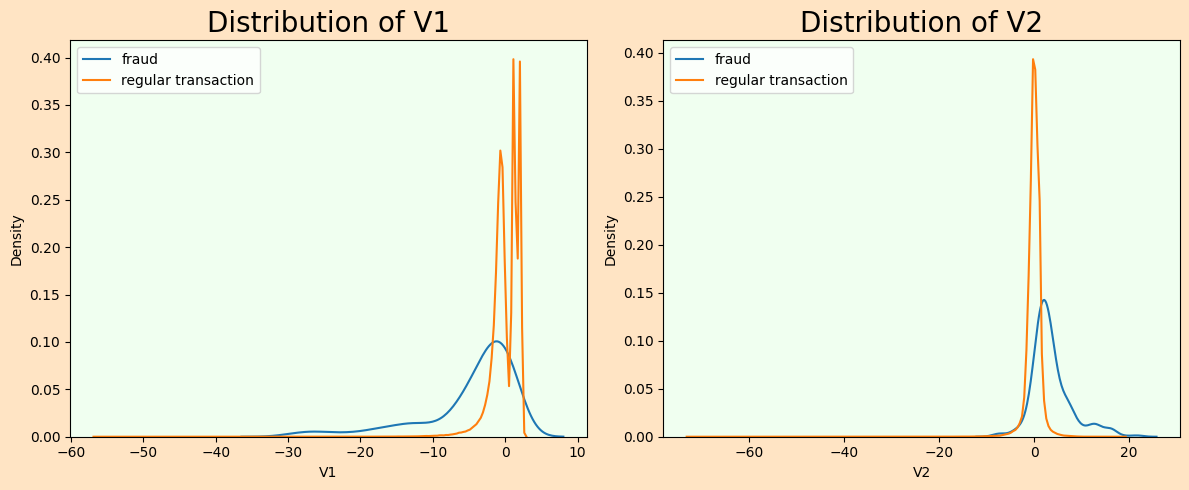

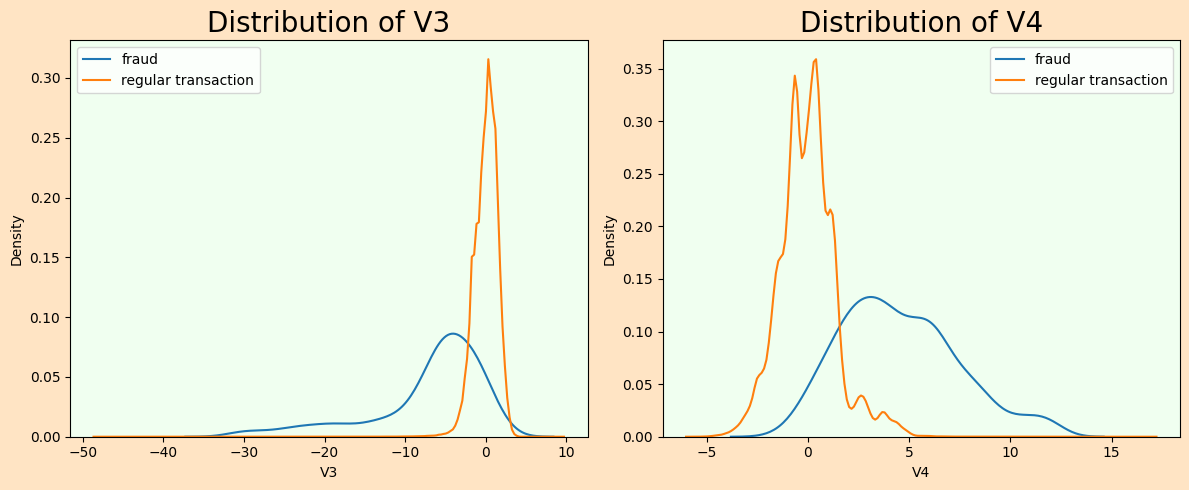

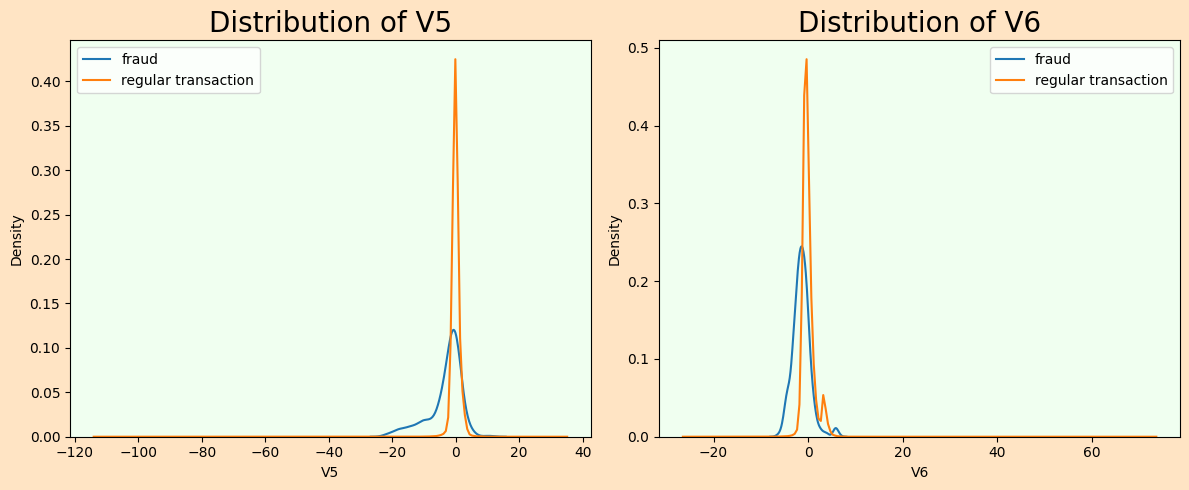

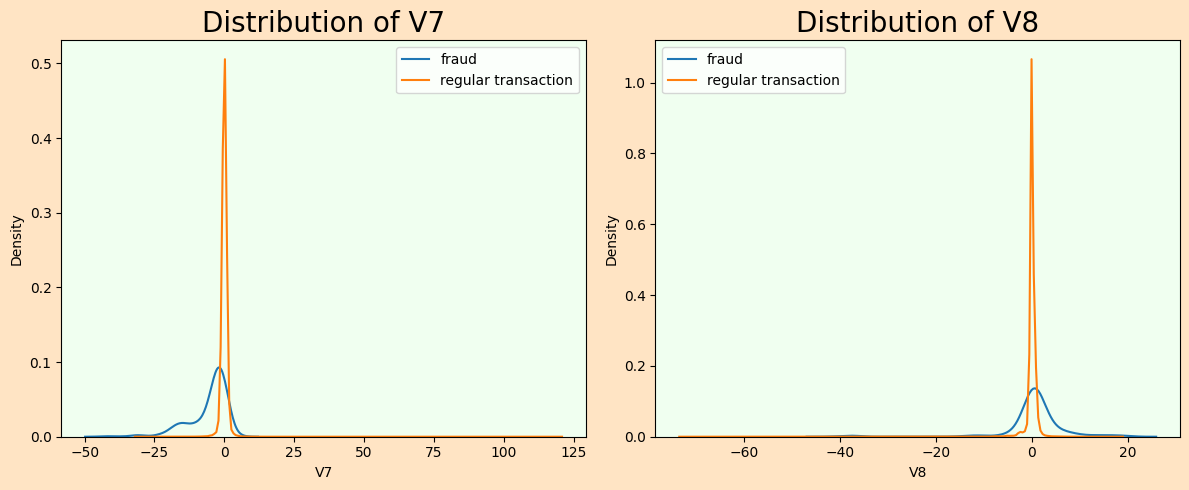

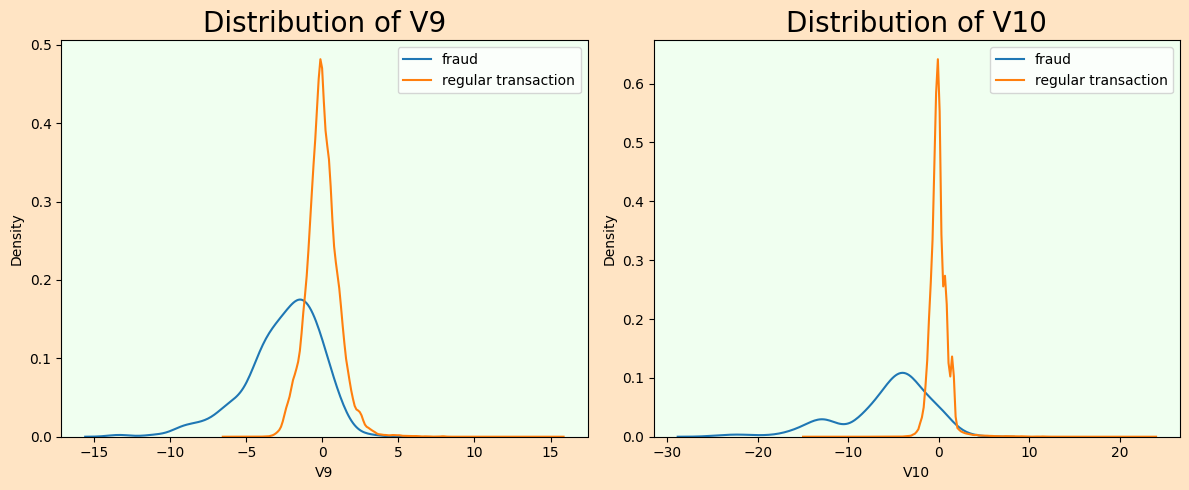

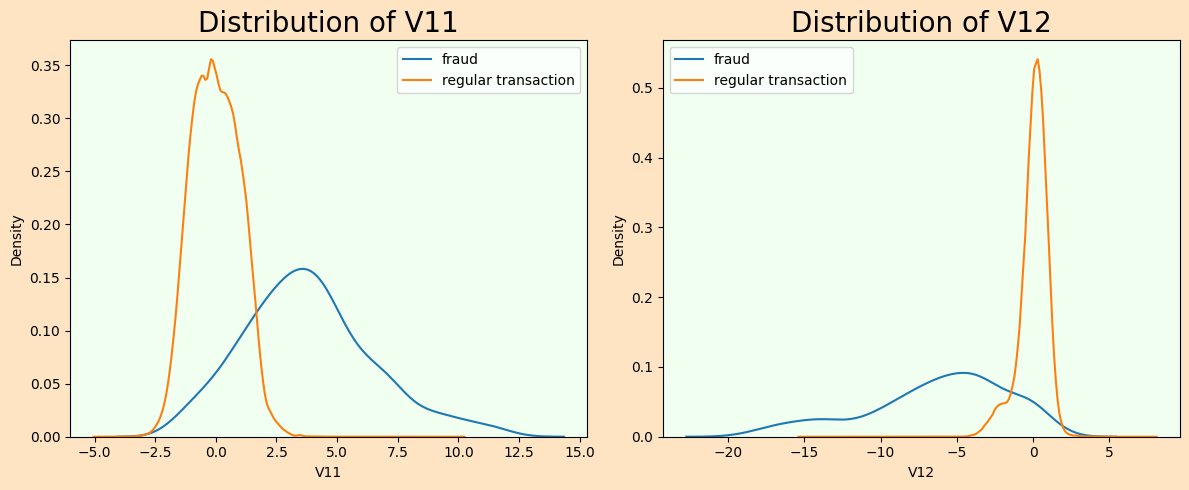

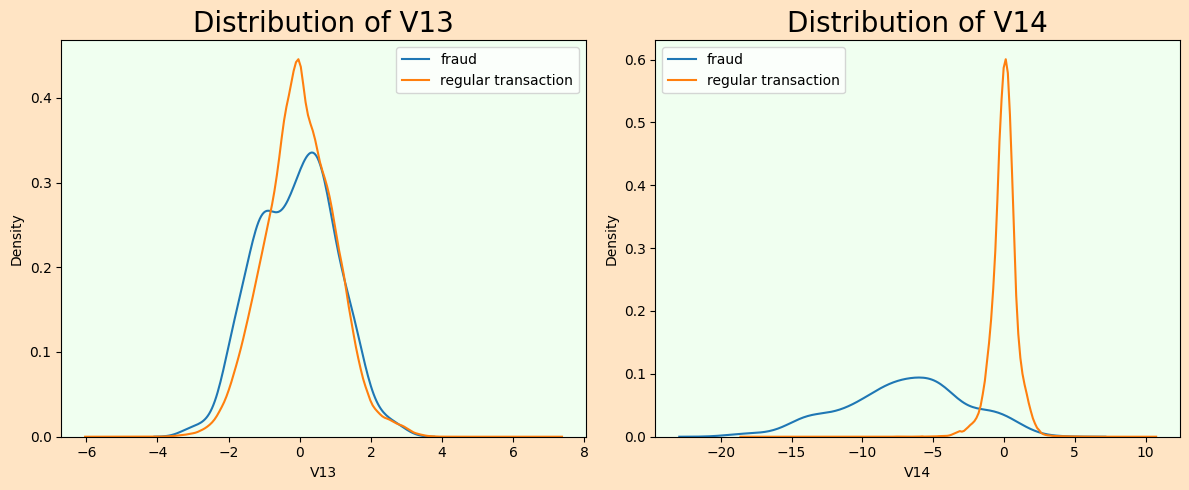

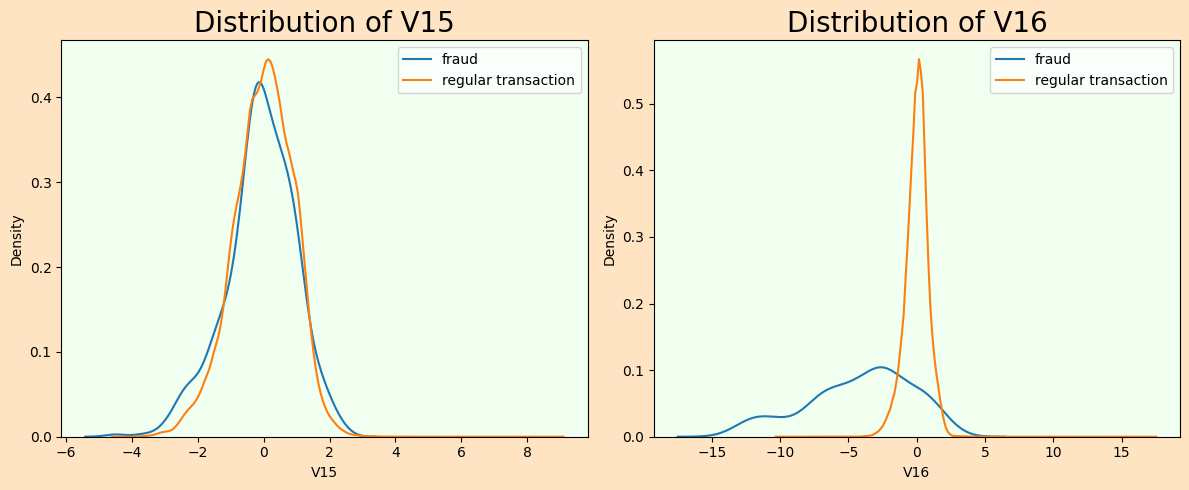

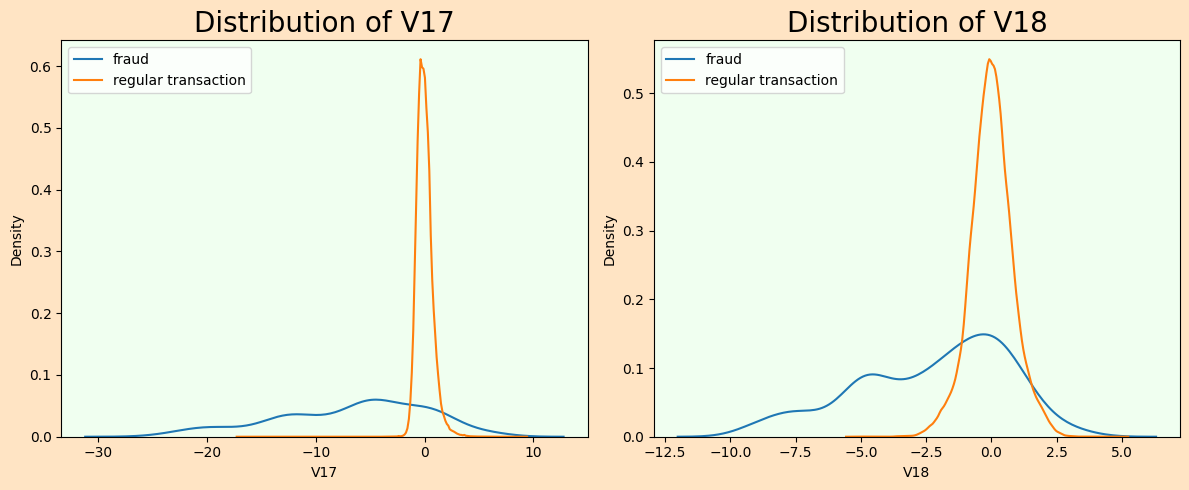

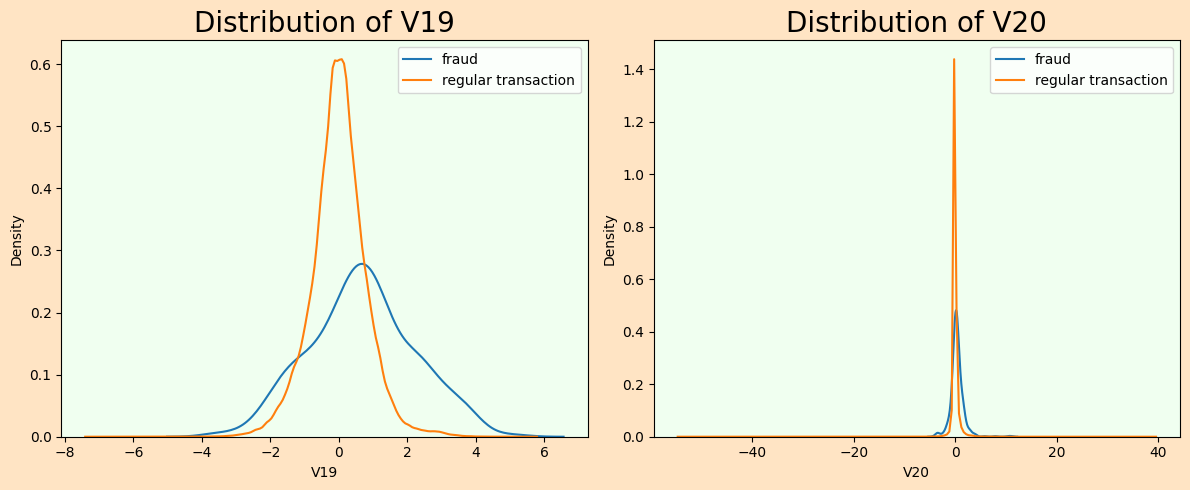

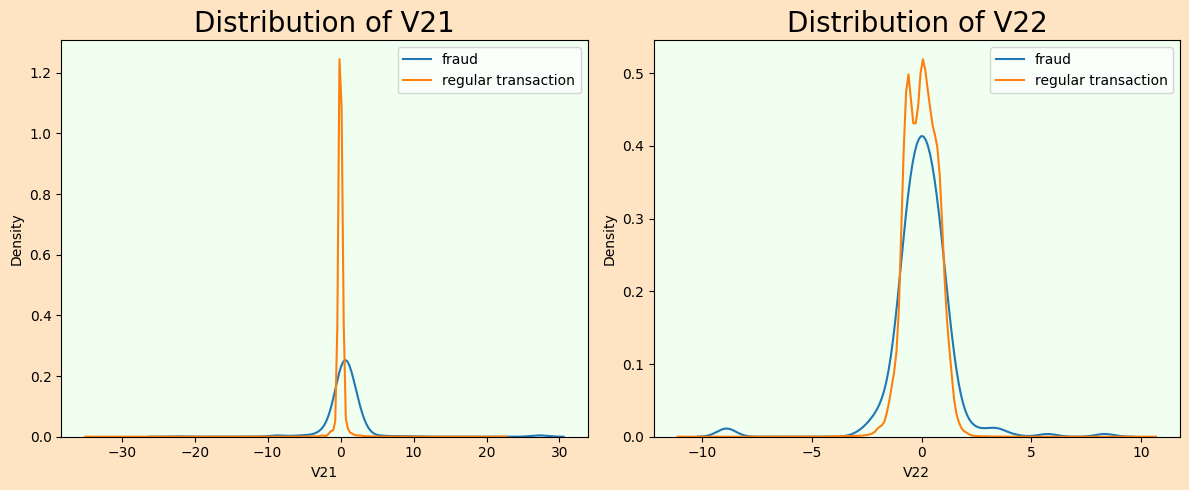

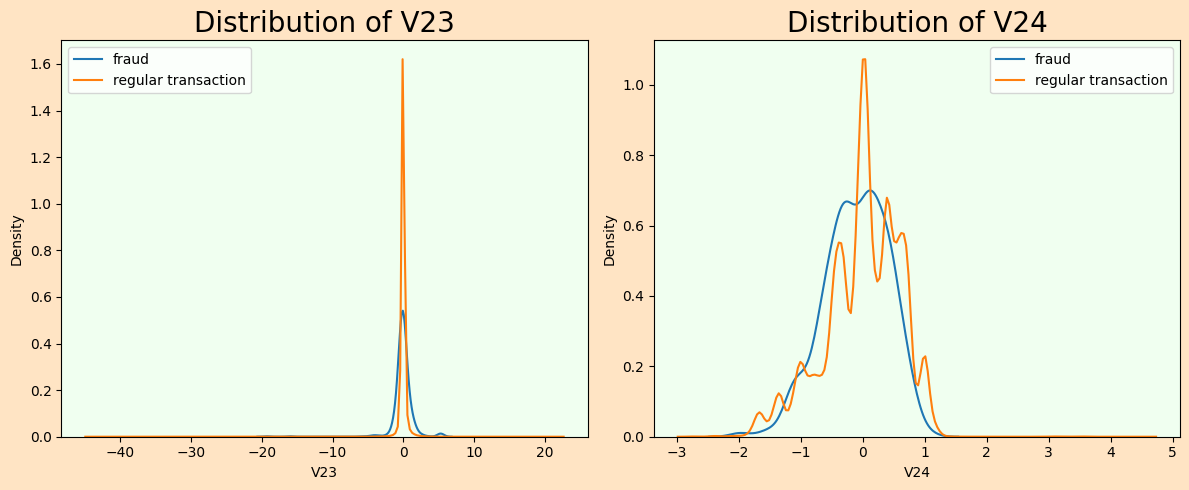

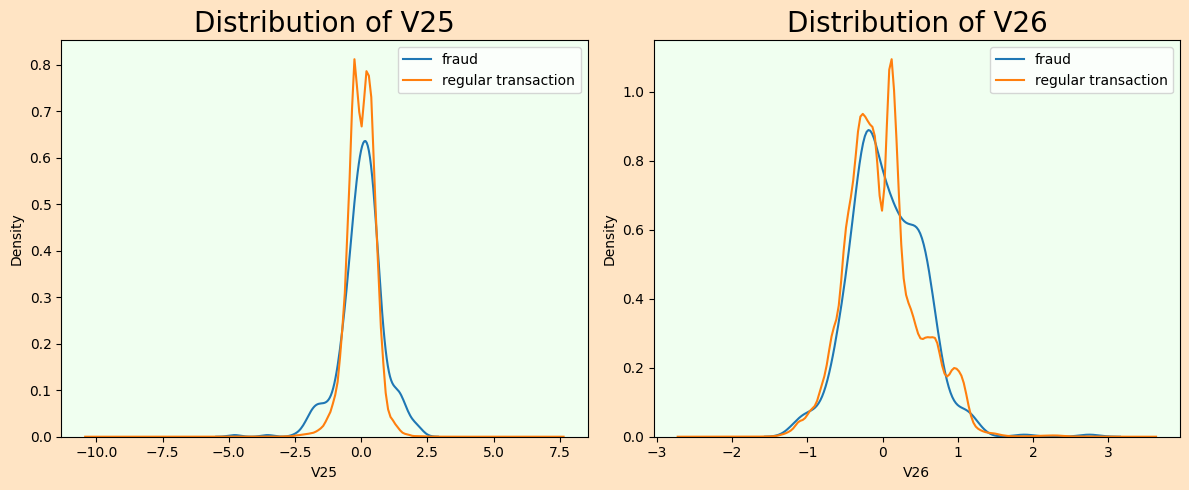

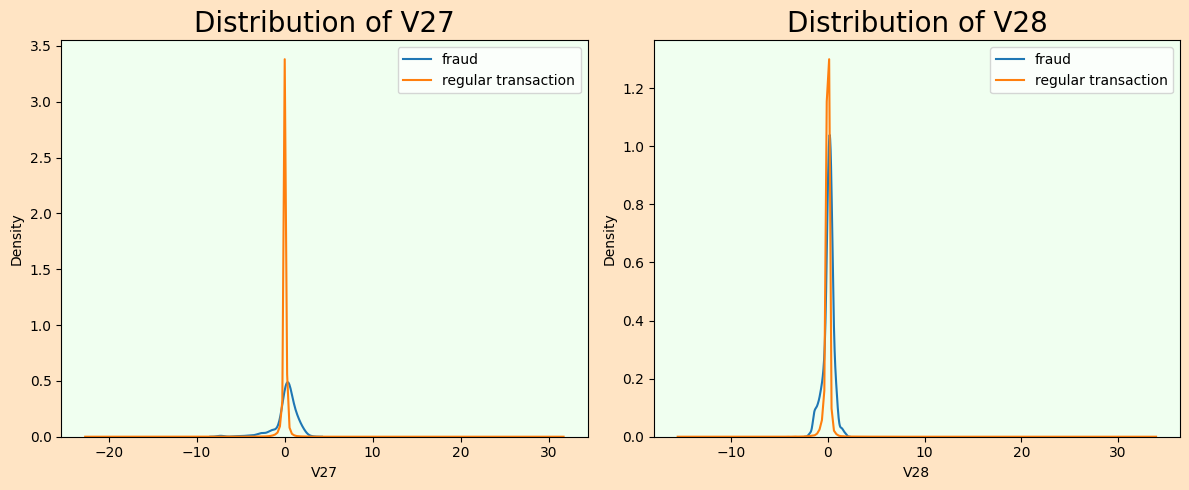

In [ ]:
# Select only the V1-V28 features
features = list(data.columns.values)
del features[0]
del features[28]
del features[28]

for i in range(14):
    fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
    ax1 = sns.distplot(data[data.Class == 1][features[i*2]],ax=ax1,hist=False)
    ax1 = sns.distplot(data[data.Class == 0][features[i*2]],ax=ax1,hist=False)
    ax1.set_title('Distribution of '+str(features[i*2]),fontsize=20)
    ax1.set_facecolor('honeydew')
    ax1.legend(labels=['fraud','regular transaction'])
    ax2 = sns.distplot(data[data.Class == 1][features[i*2+1]],ax=ax2,hist=False)
    ax2 = sns.distplot(data[data.Class == 0][features[i*2+1]],ax=ax2,hist=False)
    ax2.set_title('Distribution of '+str(features[i*2+1]),fontsize=20)
    ax2.set_facecolor('honeydew')
    ax2.legend(labels=['fraud','regular transaction'])

    plt.tight_layout()
    fig.set_facecolor('bisque')

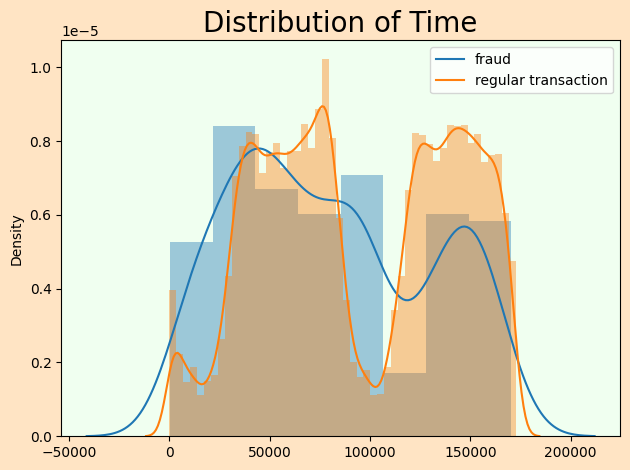

In [ ]:
sns.distplot(data['Time'][data.Class == 1])
sns.distplot(data['Time'][data.Class == 0])
plt.xlabel('')
plt.title('Distribution of Time',fontsize=20)
plt.legend(labels=['fraud','regular transaction'])

plt.gca().set_facecolor('honeydew')
plt.gcf().patch.set_facecolor('bisque')
plt.tight_layout()
plt.show()

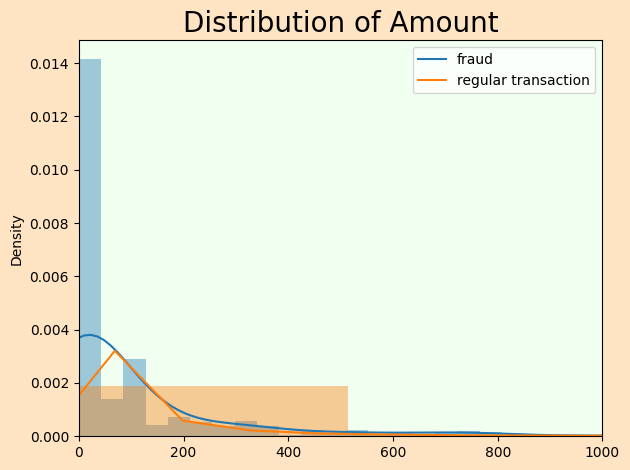

In [ ]:
sns.distplot(data['Amount'][data.Class == 1])
sns.distplot(data['Amount'][data.Class == 0])
plt.xlim(0,1000)
plt.xlabel('')
plt.title('Distribution of Amount',fontsize=20)
plt.legend(labels=['fraud','regular transaction'])

plt.gca().set_facecolor('honeydew')
plt.gcf().patch.set_facecolor('bisque')
plt.tight_layout()
plt.show()

In [ ]:
print('There are {} duplicate values in regular transactions out of {} ({:.2f}%).'.format(data[data['Class'] == 0].duplicated().sum(),data[data['Class'] == 0].shape[0],data[data['Class'] == 0].duplicated().sum()/data[data['Class'] == 0].shape[0]*100))

print('There are {} duplicate values in fraudolent transactions out of {} ({:.2f}%).'.format(data[data['Class'] == 1].duplicated().sum(),data[data['Class'] == 1].shape[0],data[data['Class'] == 1].duplicated().sum()/data[data['Class'] == 1].shape[0]*100))

There are 1062 duplicate values in regular transactions out of 284315 (0.37%).
There are 19 duplicate values in fraudolent transactions out of 492 (3.86%).


In [ ]:
print('No. of rows before dropping duplicates: {}.'.format(len(data)))

data.drop_duplicates(inplace=True)

print('No. of rows after dropping duplicates: {}.'.format(len(data)))

No. of rows before dropping duplicates: 284807.
No. of rows after dropping duplicates: 283726.


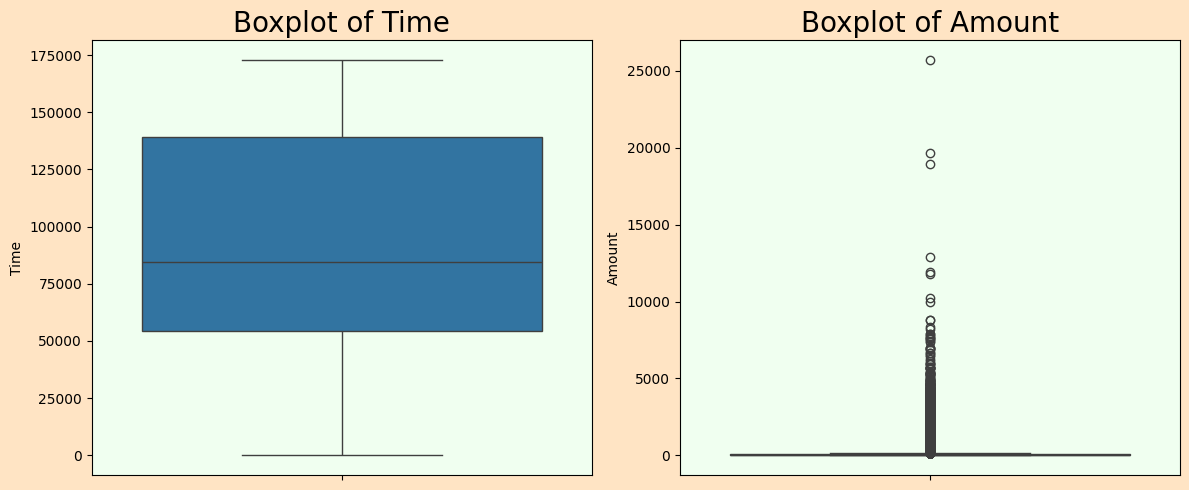

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1 = sns.boxplot(data['Time'],ax=ax1)
ax1.set_title('Boxplot of Time',fontsize=20)
ax1.set_facecolor('honeydew')
ax2 = sns.boxplot(data['Amount'],ax=ax2)
ax2.set_title('Boxplot of Amount',fontsize=20)
ax2.set_facecolor('honeydew')

plt.tight_layout()
fig.set_facecolor('bisque')

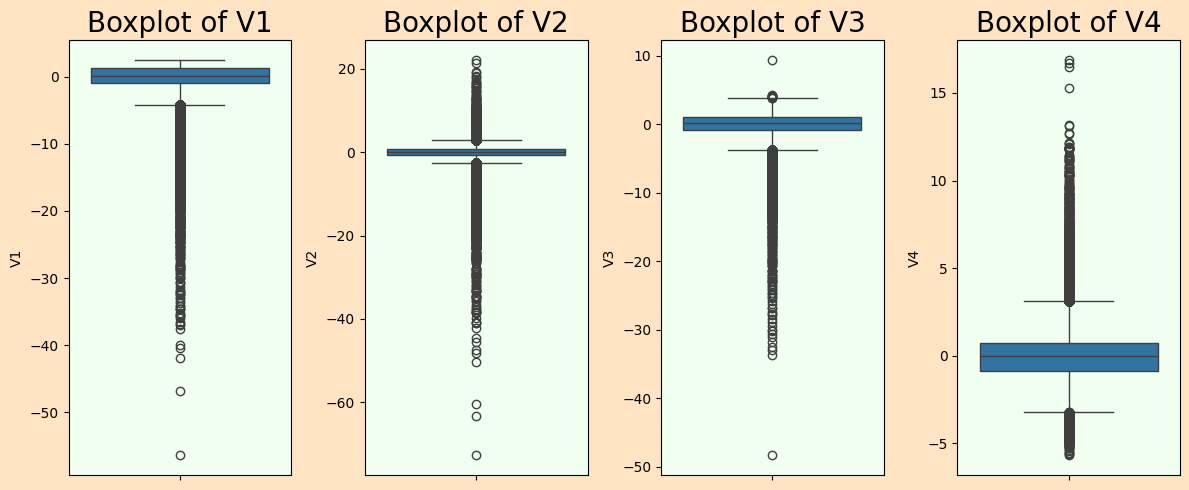

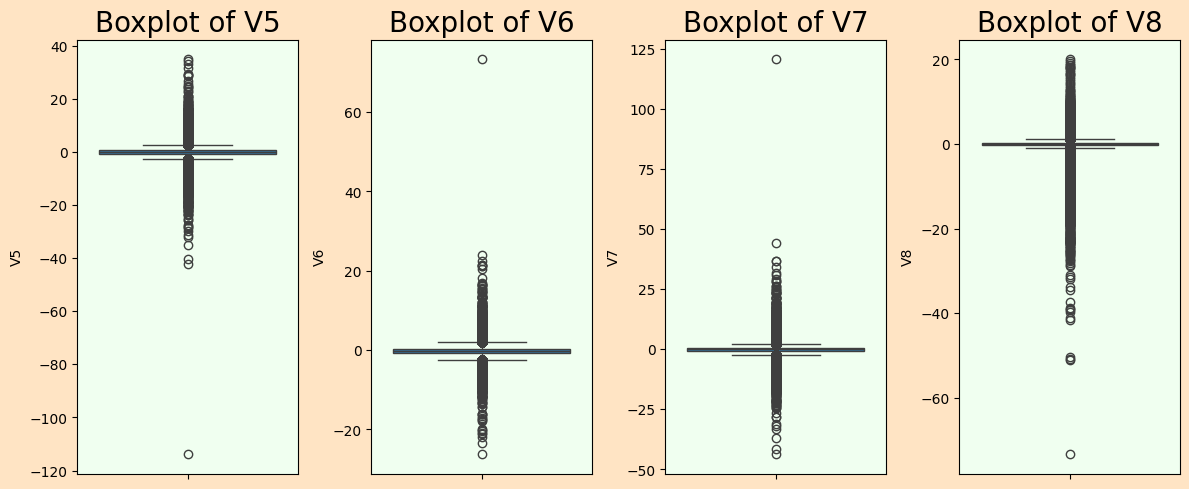

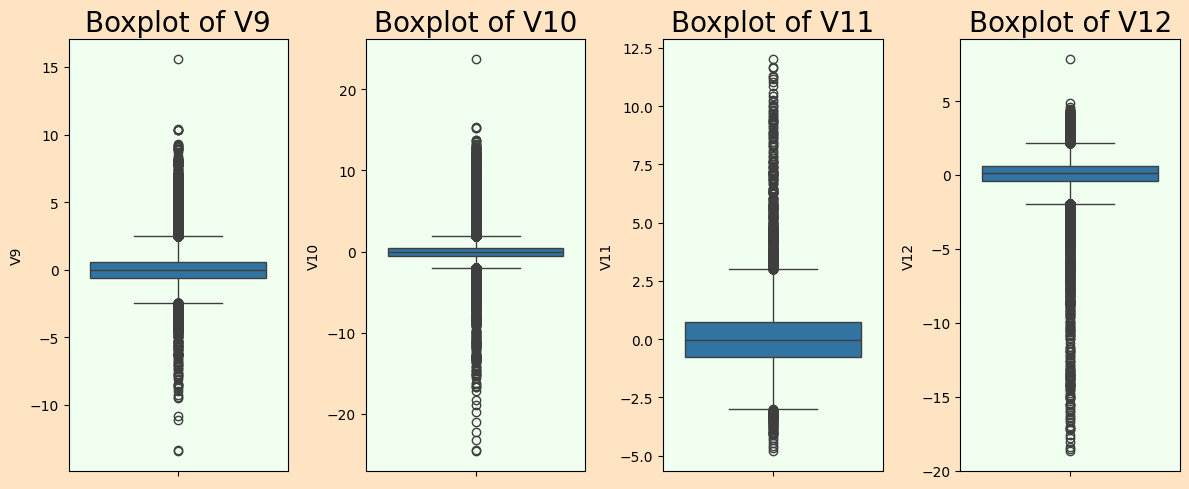

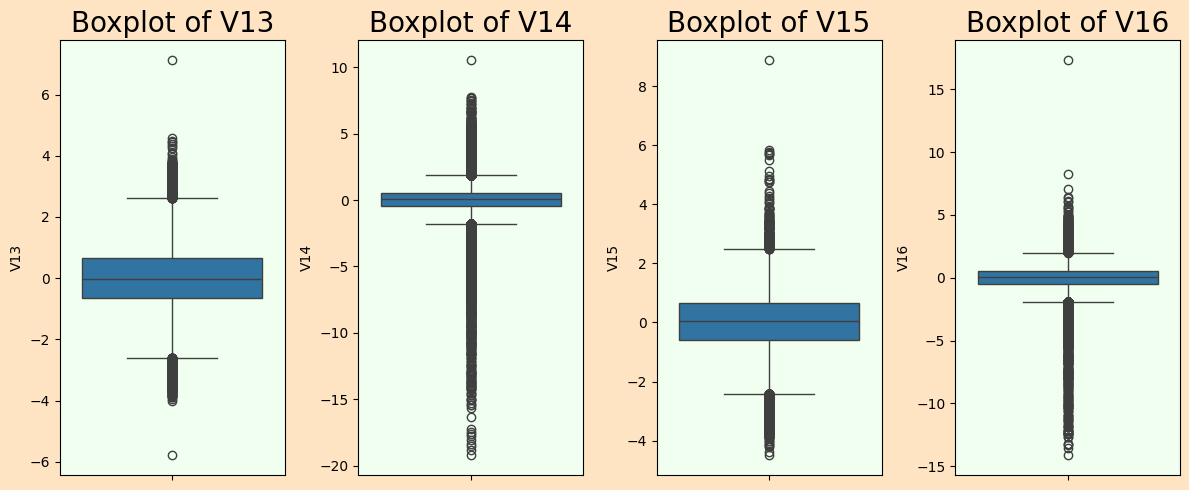

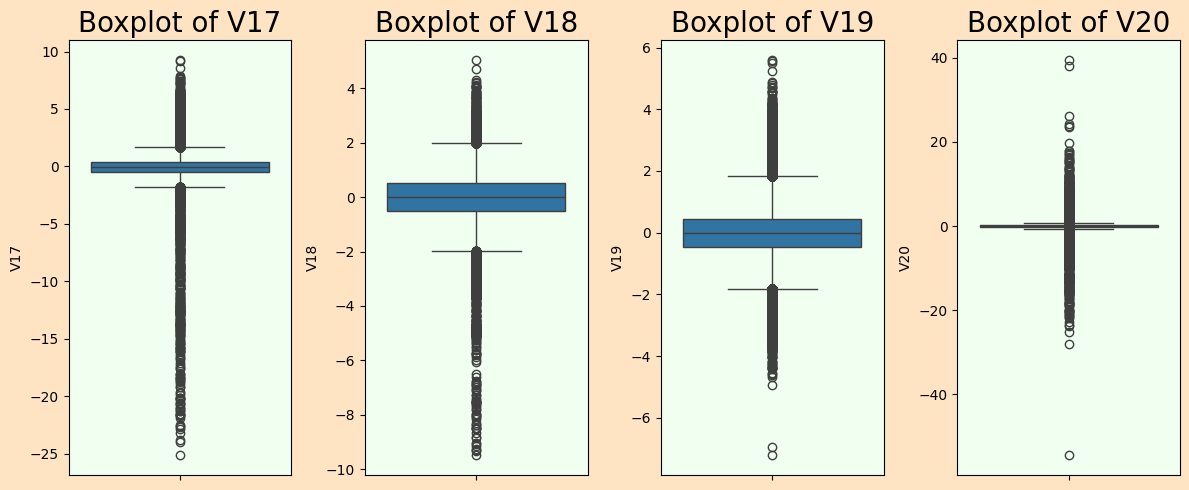

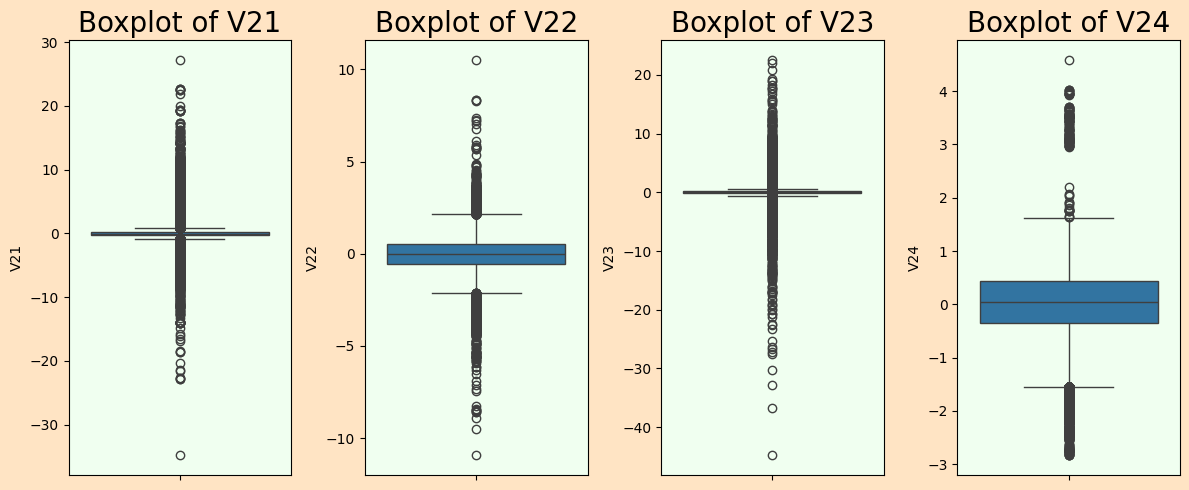

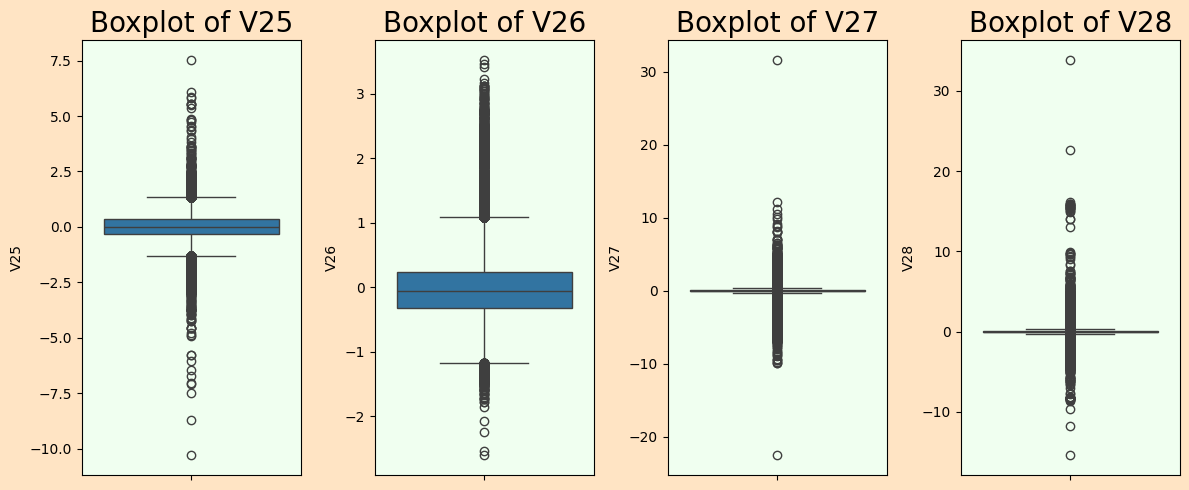

In [ ]:
for i in range(7):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.boxplot(data[features[i*4]],ax=ax1)
    ax1.set_title('Boxplot of '+str(features[i*4]),fontsize=20)
    ax1.set_facecolor('honeydew')
    ax2 = sns.boxplot(data[features[i*4+1]],ax=ax2)
    ax2.set_title('Boxplot of '+str(features[i*4+1]),fontsize=20)
    ax2.set_facecolor('honeydew')
    ax3 = sns.boxplot(data[features[i*4+2]],ax=ax3)
    ax3.set_title('Boxplot of '+str(features[i*4+2]),fontsize=20)
    ax3.set_facecolor('honeydew')
    ax4 = sns.boxplot(data[features[i*4+3]],ax=ax4)
    ax4.set_title('Boxplot of '+str(features[i*4+3]),fontsize=20)
    ax4.set_facecolor('honeydew')

    plt.tight_layout()
    fig.set_facecolor('bisque')

In [ ]:
def outlier_imputer(data,features):

    data_out = data.copy()

    for column in features:

        # First define the first and third quartiles
        Q1 = data_out[column].quantile(0.25)
        Q3 = data_out[column].quantile(0.75)
        # Define the inter-quartile range
        IQR = Q3 - Q1
        # ... and the lower/higher threshold values
        lowerL = Q1 - 1.5 * IQR
        higherL = Q3 + 1.5 * IQR

        # Impute 'left' outliers
        data_out.loc[data_out[column] < lowerL,column] = lowerL
        # Impute 'right' outliers
        data_out.loc[data_out[column] > higherL,column] = higherL

    return data_out

data2 = data.drop('Class',axis=1)

feats = list(data2.columns.values)

capped_data = outlier_imputer(data,feats)

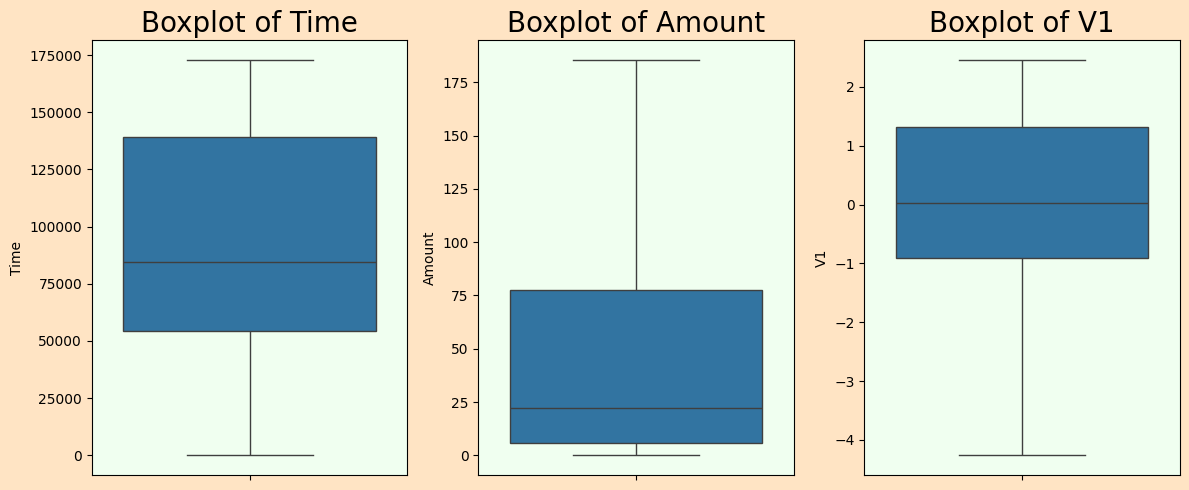

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,5))

ax1 = sns.boxplot(capped_data['Time'],ax=ax1)
ax1.set_title('Boxplot of Time',fontsize=20)
ax1.set_facecolor('honeydew')
ax2 = sns.boxplot(capped_data['Amount'],ax=ax2)
ax2.set_title('Boxplot of Amount',fontsize=20)
ax2.set_facecolor('honeydew')
ax3 = sns.boxplot(capped_data['V1'],ax=ax3)
ax3.set_title('Boxplot of V1',fontsize=20)
ax3.set_facecolor('honeydew')

plt.tight_layout()
fig.set_facecolor('bisque')

In [ ]:
data3 = data.copy()
data3 = data3.drop('Class',axis=1)

In [ ]:
model = IsolationForest(n_estimators=150,max_samples='auto',contamination=float(0.1),max_features=1.0)
model.fit(data3)

IsolationForest(contamination=0.1, n_estimators=150)

In [ ]:
scores  = model.decision_function(data3)
anomaly = model.predict(data3)

data3['score']   = scores
data3['anomaly'] = anomaly

data3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,score,anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.065924,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.085962,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.002823,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.056434,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.059543,1


In [ ]:
anomaly = data3.loc[data3['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print('The total number of outliers is {} out of {}.'.format(len(anomaly),len(data)))
print('They are the {:.2f}% of the total amount of data.'.format(len(anomaly)/len(data)*100))

The total number of outliers is 28373 out of 283726.
They are the 10.00% of the total amount of data.


In [ ]:
forest_data = data.drop(anomaly_index,axis=0).reset_index(drop=True)

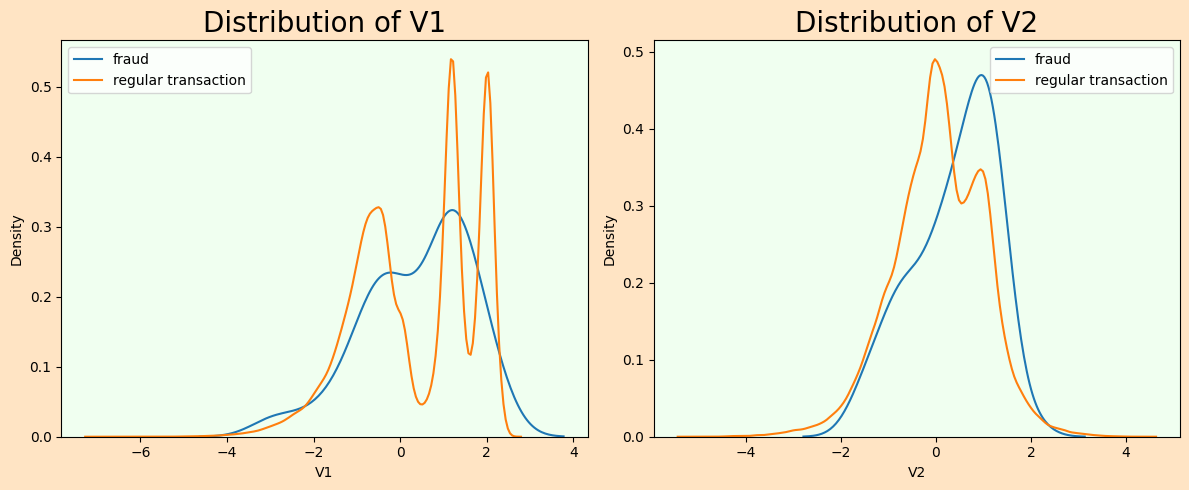

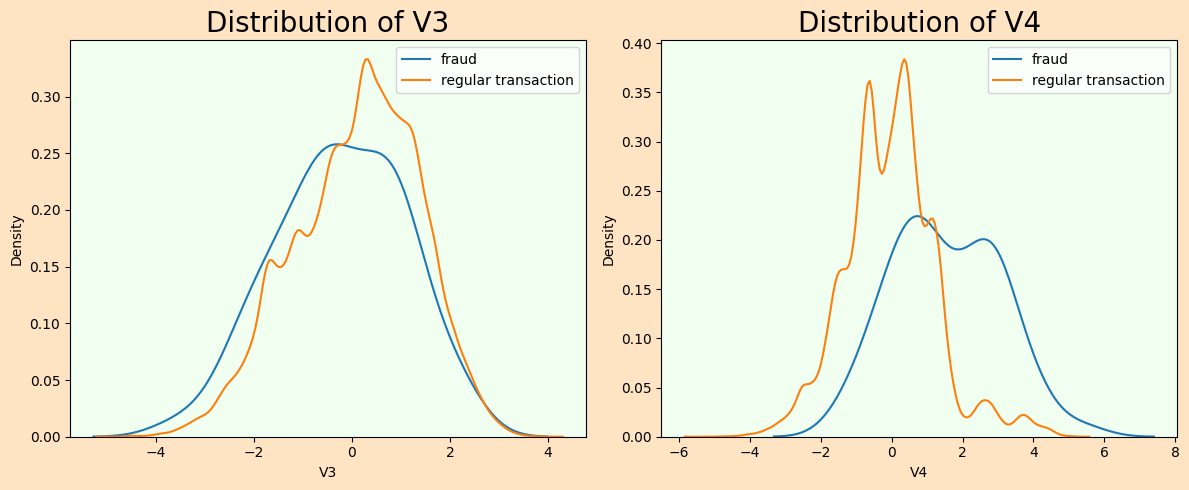

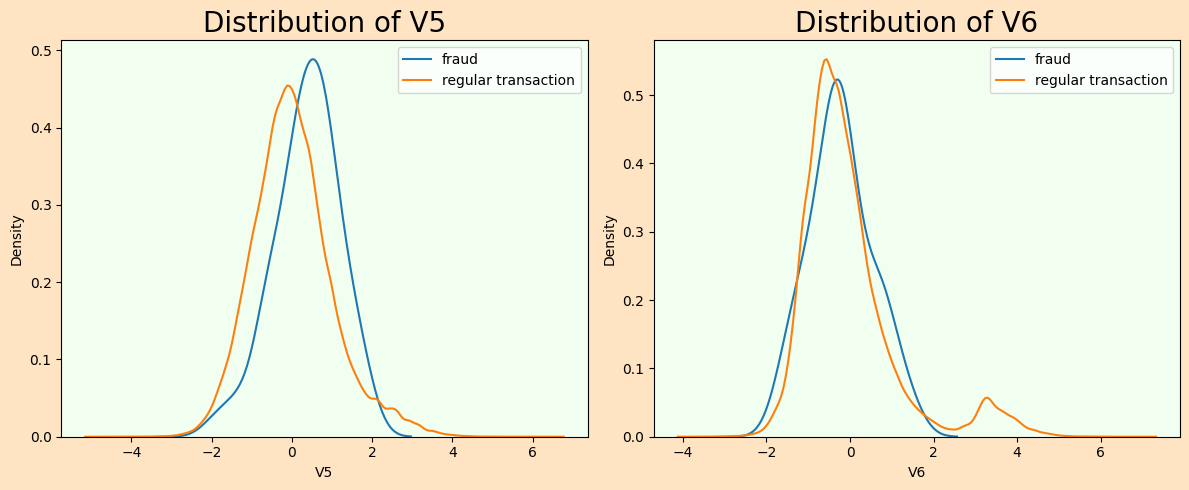

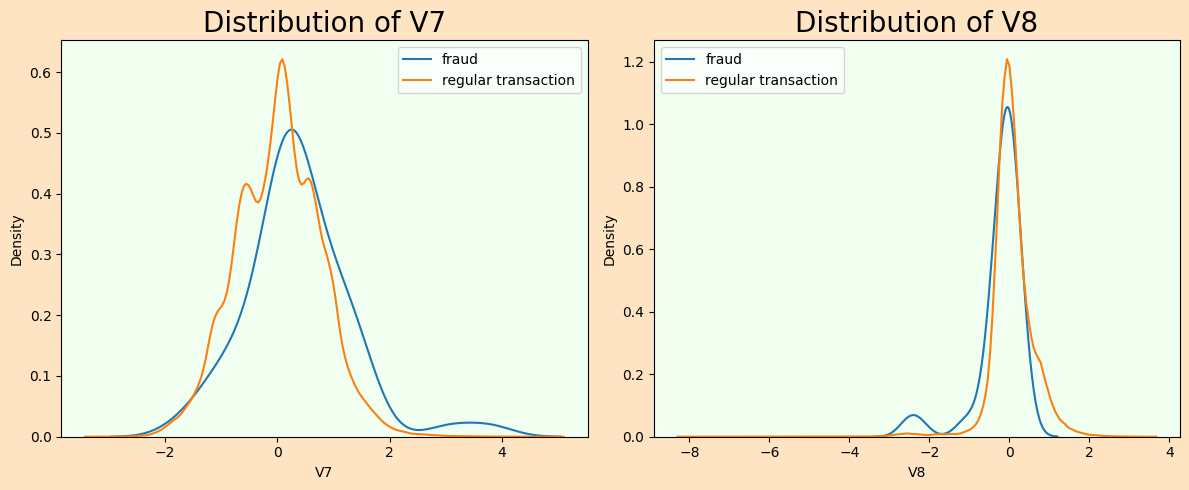

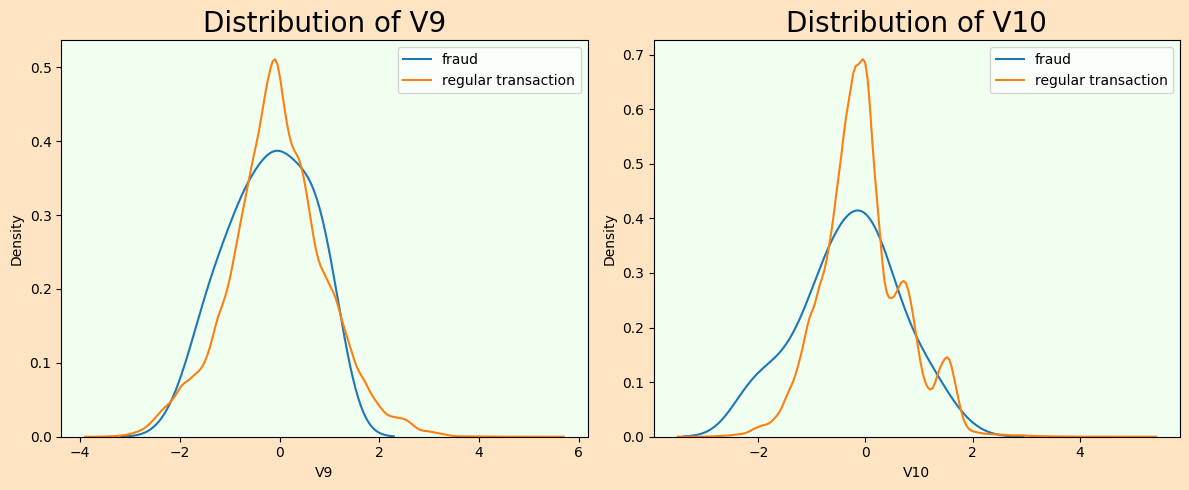

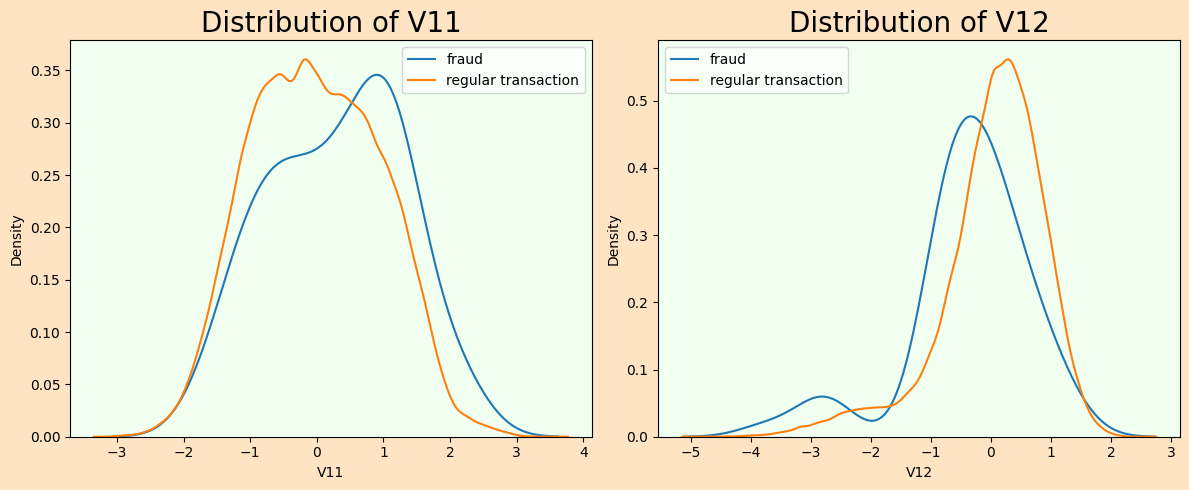

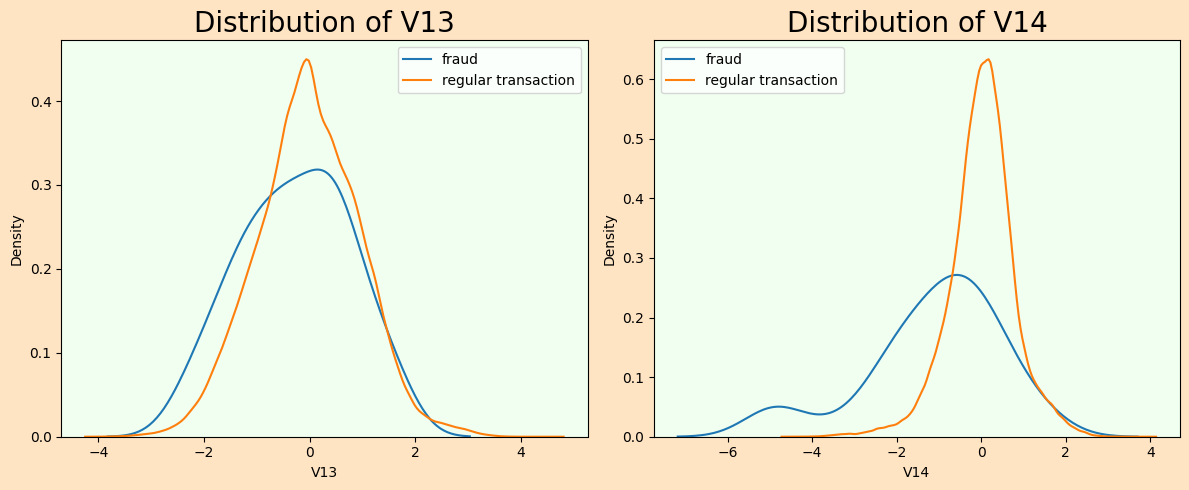

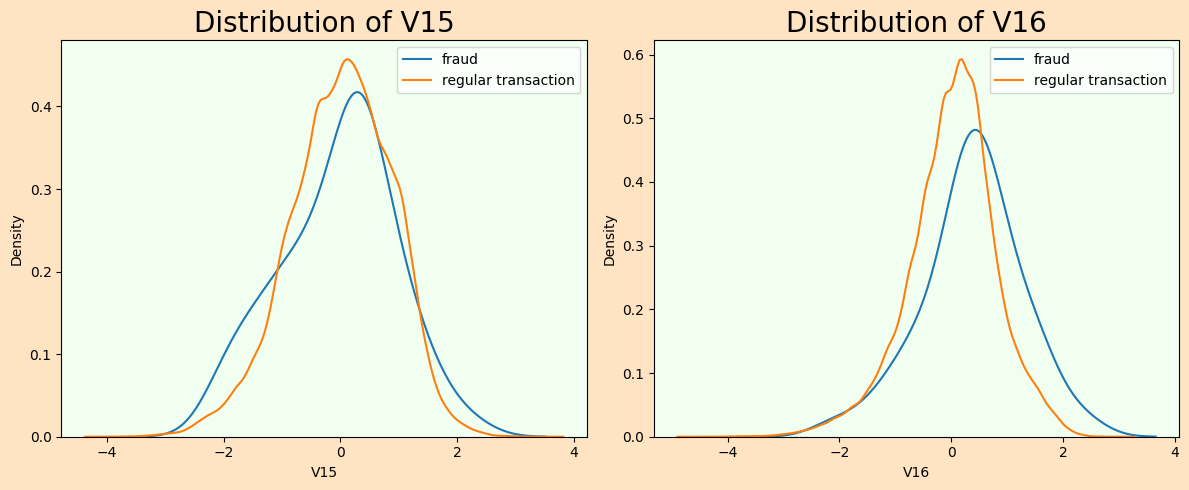

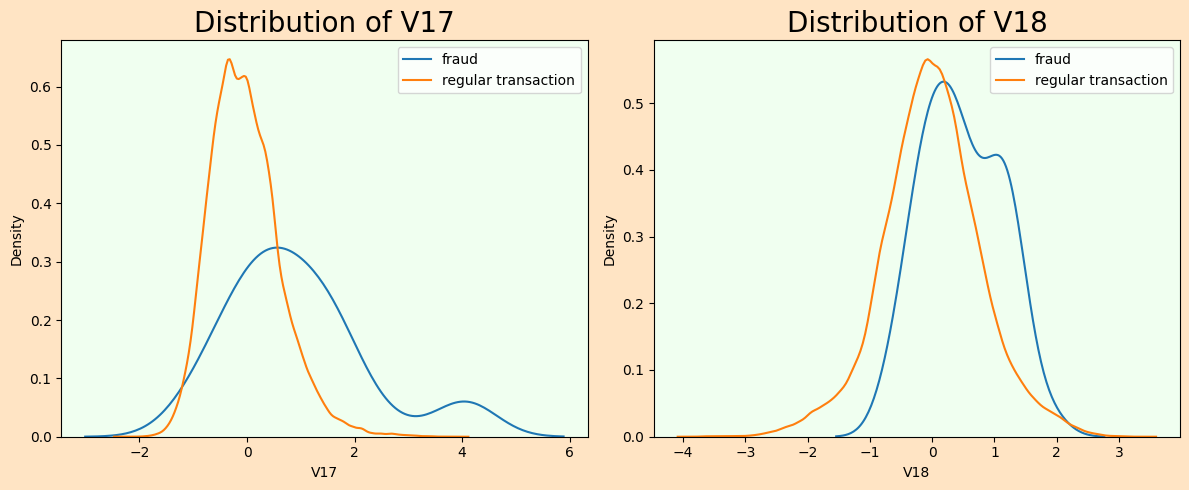

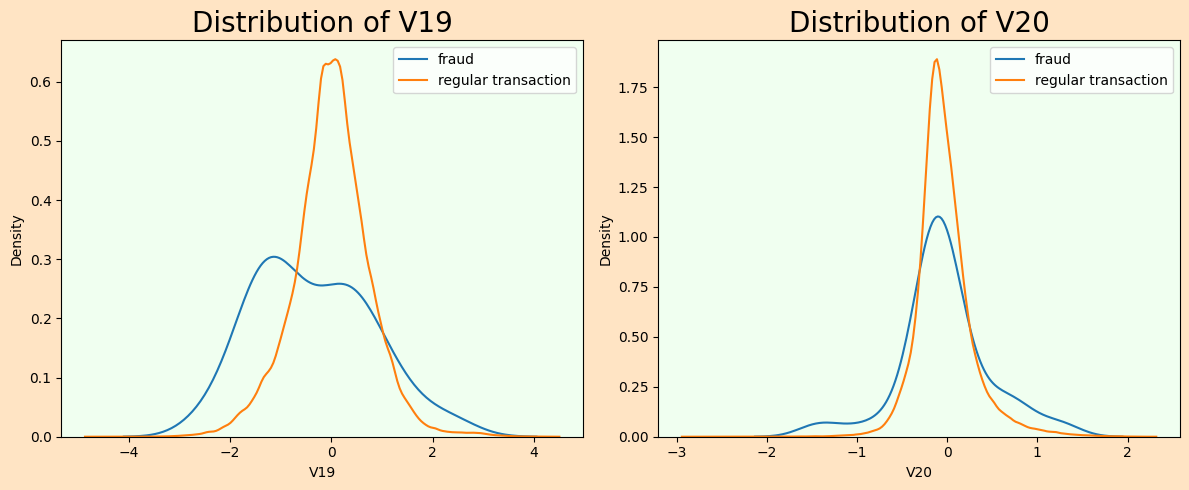

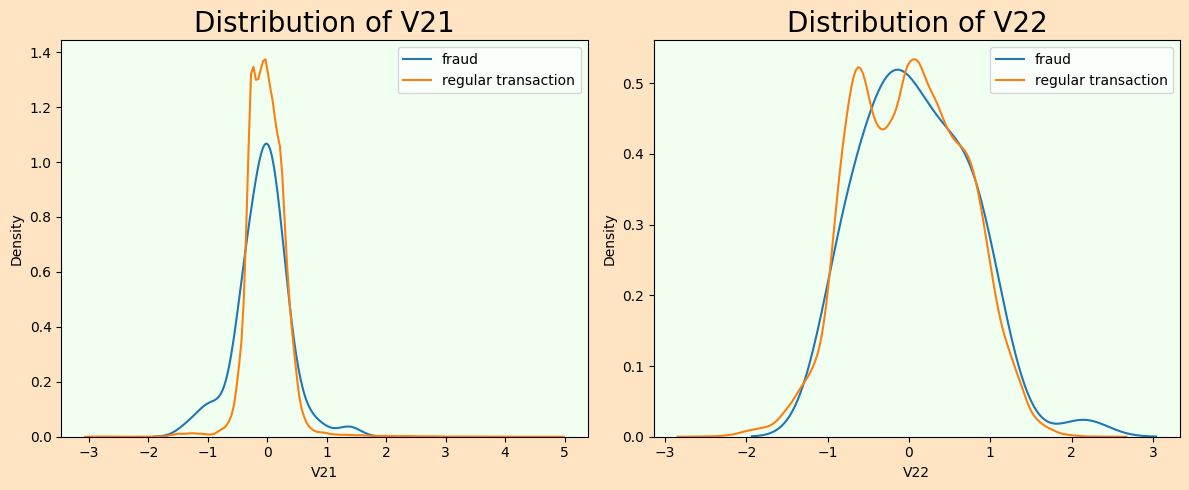

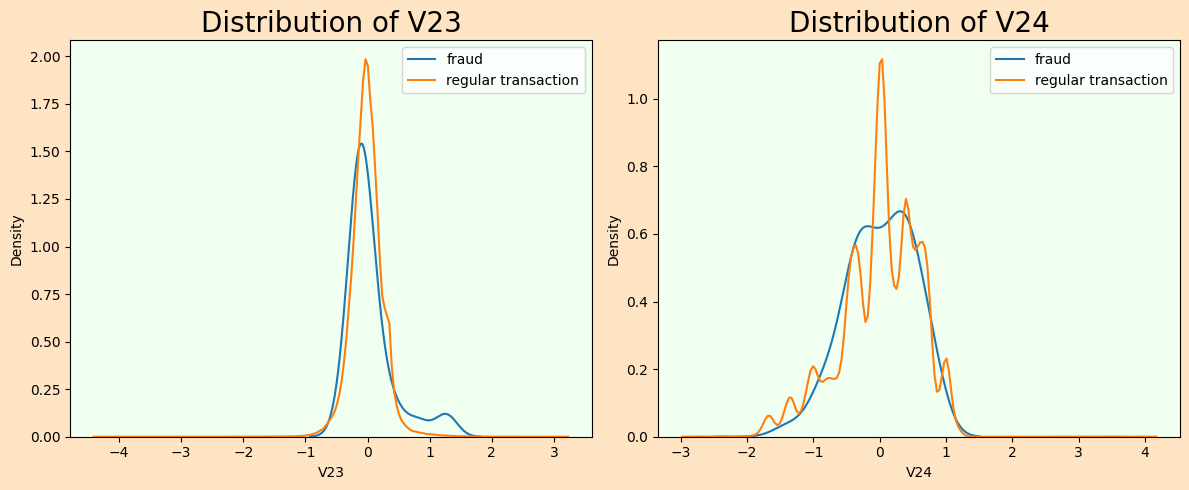

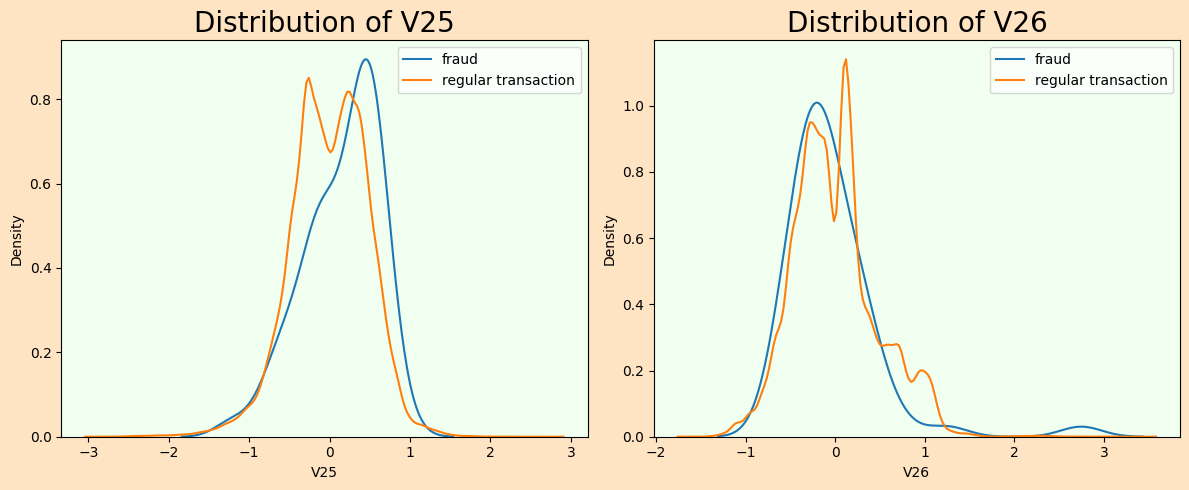

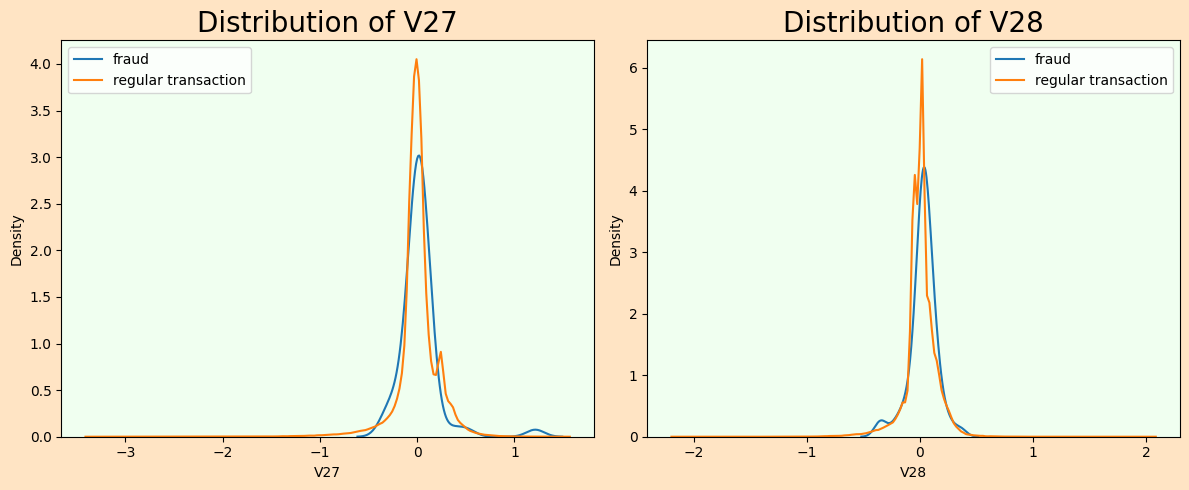

In [ ]:
for i in range(14):
    fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
    ax1 = sns.distplot(forest_data[forest_data.Class == 1][features[i*2]],ax=ax1,hist=False)
    ax1 = sns.distplot(forest_data[forest_data.Class == 0][features[i*2]],ax=ax1,hist=False)
    ax1.set_title('Distribution of '+str(features[i*2]),fontsize=20)
    ax1.set_facecolor('honeydew')
    ax1.legend(labels=['fraud','regular transaction'])
    ax2 = sns.distplot(forest_data[forest_data.Class == 1][features[i*2+1]],ax=ax2,hist=False)
    ax2 = sns.distplot(forest_data[forest_data.Class == 0][features[i*2+1]],ax=ax2,hist=False)
    ax2.set_title('Distribution of '+str(features[i*2+1]),fontsize=20)
    ax2.set_facecolor('honeydew')
    ax2.legend(labels=['fraud','regular transaction'])

    plt.tight_layout()
    fig.set_facecolor('bisque')

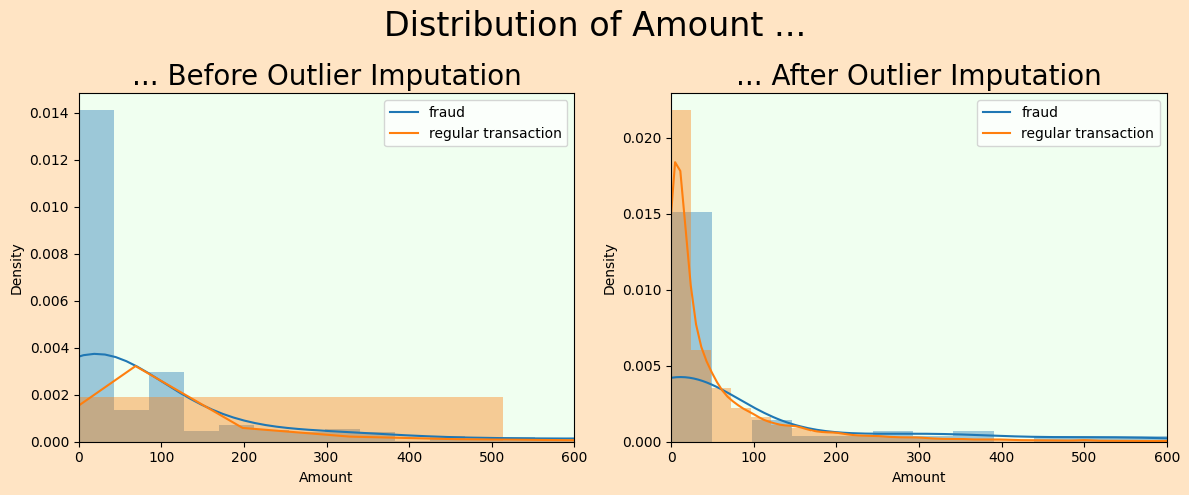

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1 = sns.distplot(data['Amount'][data.Class == 1],ax=ax1)
ax1 = sns.distplot(data['Amount'][data.Class == 0],ax=ax1)
ax1.set_xlim(0,600)
ax1.set_title('... Before Outlier Imputation',fontsize=20)
ax1.legend(labels=['fraud','regular transaction'])
ax1.set_facecolor('honeydew')

ax2 = sns.distplot(forest_data['Amount'][forest_data.Class == 1],ax=ax2)
ax2 = sns.distplot(forest_data['Amount'][forest_data.Class == 0],ax=ax2)
ax2.set_xlim(0,600)
ax2.set_title('... After Outlier Imputation',fontsize=20)
ax2.legend(labels=['fraud','regular transaction'])
ax2.set_facecolor('honeydew')

fig.suptitle("Distribution of Amount ...",fontsize=24)

plt.tight_layout()
fig.set_facecolor('bisque')

In [ ]:
X = forest_data.drop('Class',axis=1)
y = forest_data['Class']

In [ ]:
# Random Forest Model
random_forest = RandomForestClassifier(random_state=1,max_depth=4)
random_forest.fit(X,y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(30)

,importance
feature,
V14,0.258
V17,0.208
V4,0.112
V19,0.034
V10,0.030
Amount,0.026
V7,0.025
V28,0.022
V1,0.020


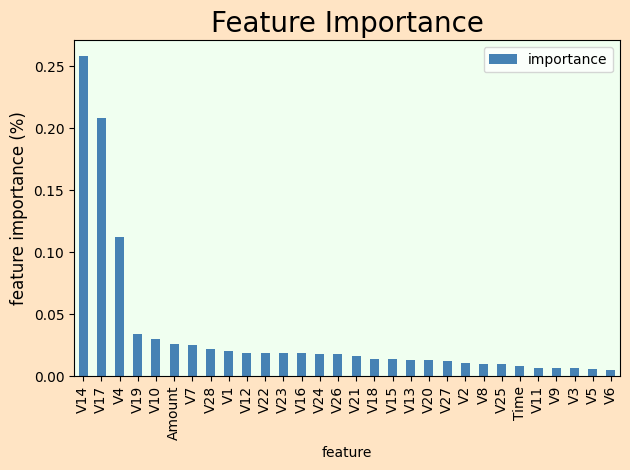

In [ ]:
importances.plot.bar(color='steelblue')

plt.ylabel('feature importance (%)',fontsize=12)
plt.title('Feature Importance',fontsize=20)

plt.tight_layout()
plt.gcf().patch.set_facecolor('bisque')
plt.gca().set_facecolor('honeydew')
plt.show()

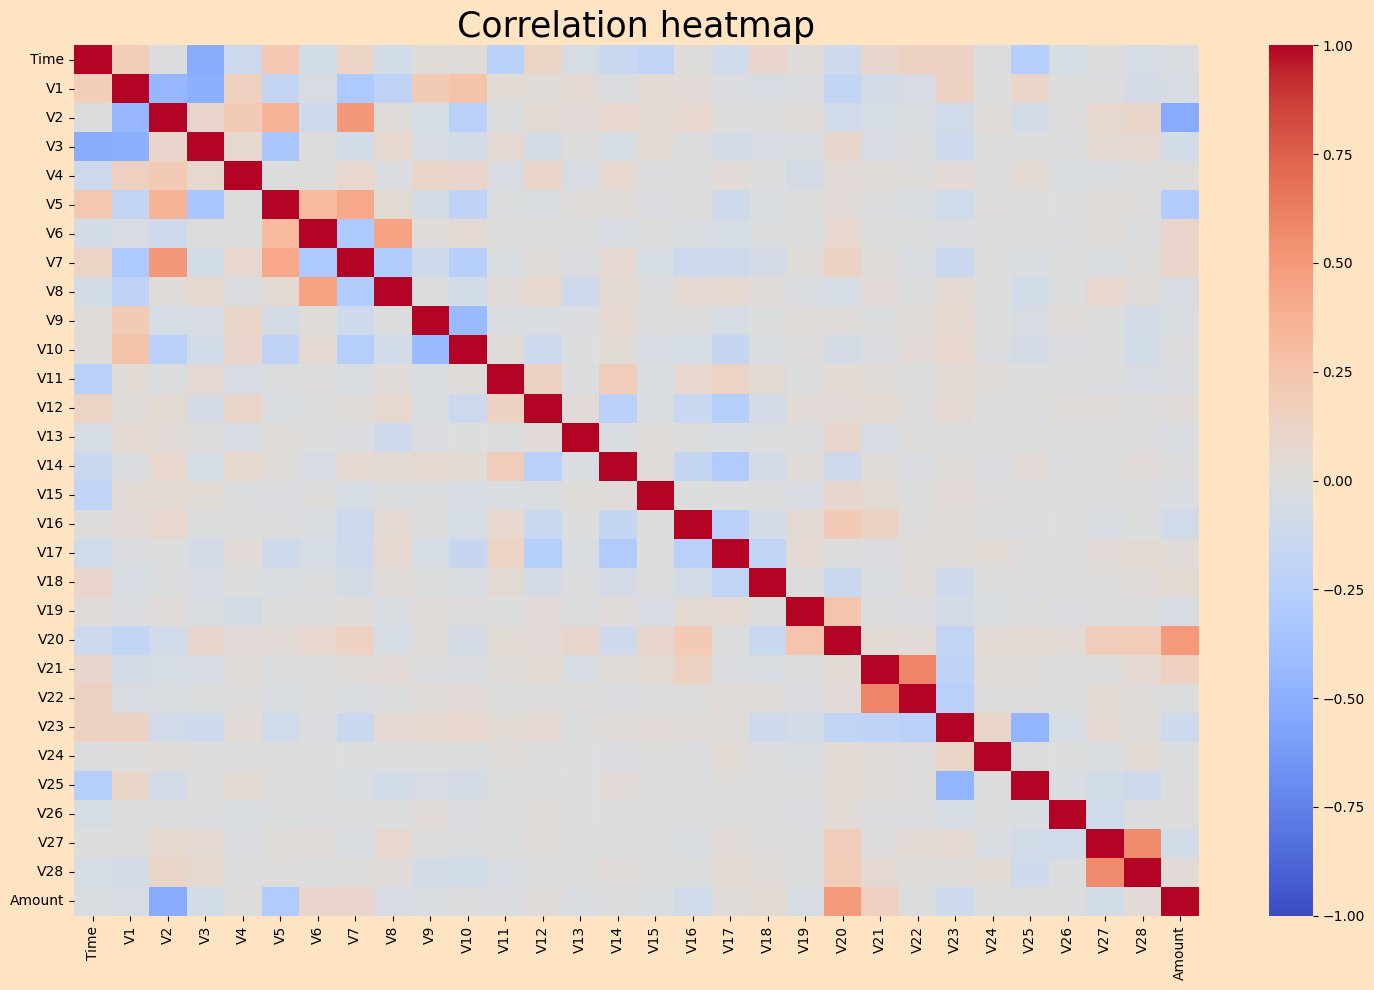

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(X.corr(method='pearson'),vmin=-1,vmax=1,annot=False,cmap='coolwarm')
plt.title('Correlation heatmap',fontsize=25)

plt.tight_layout()
plt.gcf().patch.set_facecolor('bisque')
plt.gca().set_facecolor('honeydew')
plt.show()

In [ ]:
# Drop all of the features that have very similar distributions between frauds and non-frauds.
X = X.drop(['V2','V5','V6','V7','V8','V11','V15','V16','V18',
            'V22','V23','V25','V26','V27','V28'],axis=1)

In [ ]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds,average='micro')
    recall    = recall_score(y_test_data,preds,average='micro')
    f1        = f1_score(y_test_data,preds,average='micro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table

In [ ]:
random_forest = RandomForestClassifier(class_weight='balanced')

random_forest.fit(X_train,y_train)

# Use the model to predict on train data
rf_train_preds = random_forest.predict(X_train)

rf_train_results = get_test_scores('RF (train)',rf_train_preds,y_train)
rf_train_results

,model,precision,recall,F1,accuracy
0,RF (train),0.999994,0.999994,0.999994,0.999994


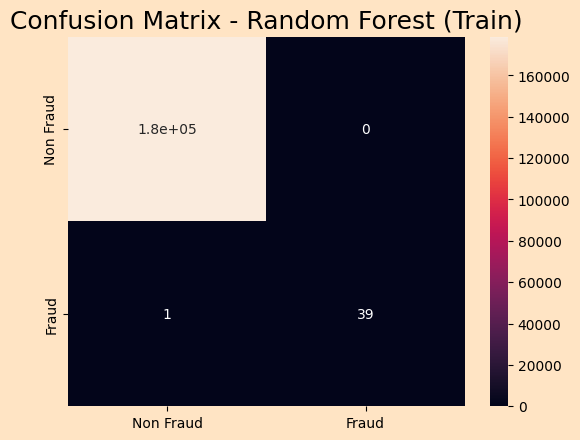

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_train,rf_train_preds,labels=random_forest.classes_)

ax = sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud', 'Fraud'])
ax.set_title('Confusion Matrix - Random Forest (Train)',fontsize=18)

plt.gcf().patch.set_facecolor('bisque')

In [ ]:
# Use the model to predict on test data
rf_test_preds = random_forest.predict(X_test)

rf_test_results = get_test_scores('RF (test)',rf_test_preds,y_test)
rf_test_results

,model,precision,recall,F1,accuracy
0,RF (test),0.999778,0.999778,0.999778,0.999778


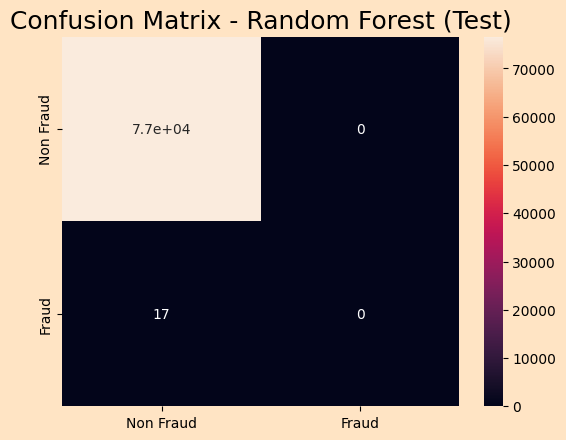

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,rf_test_preds,labels=random_forest.classes_)

ax = sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - Random Forest (Test)',fontsize=18)

plt.gcf().patch.set_facecolor('bisque')

In [ ]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic',random_state=42)

xgb.fit(X_train,y_train)

# Use the model to predict on train data
xgb_train_preds = xgb.predict(X_train)

xgb_train_results = get_test_scores('XGB (train)',xgb_train_preds,y_train)
xgb_train_results

,model,precision,recall,F1,accuracy
0,XGB (train),1.0,1.0,1.0,1.0


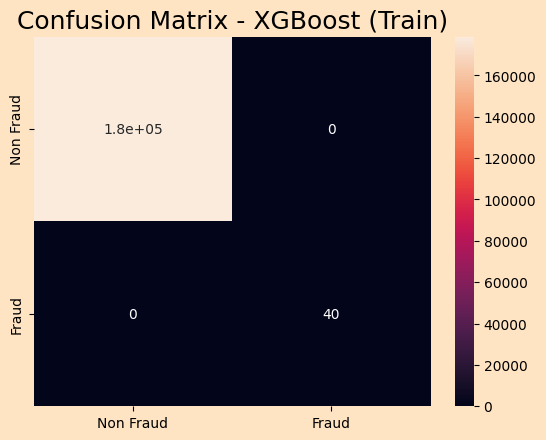

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_train,xgb_train_preds,labels=xgb.classes_)

ax = sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - XGBoost (Train)',fontsize=18)

plt.gcf().patch.set_facecolor('bisque')

In [ ]:
# Use the model to predict on test data
xgb_test_preds = xgb.predict(X_test)

xgb_test_results = get_test_scores('XGB (test)',xgb_test_preds,y_test)
xgb_test_results

,model,precision,recall,F1,accuracy
0,XGB (test),0.999778,0.999778,0.999778,0.999778


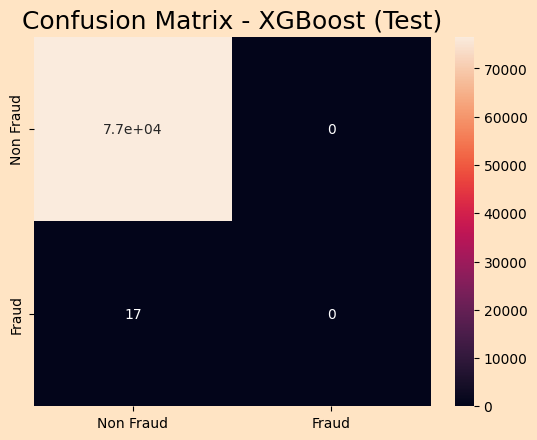

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,xgb_test_preds,labels=xgb.classes_)

ax = sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - XGBoost (Test)',fontsize=18)

plt.gcf().patch.set_facecolor('bisque')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42,sampling_strategy='majority')

# Balancing the data
X_resampled,y_resampled = rus.fit_resample(X_train,y_train)

In [ ]:
random_forest.fit(X_resampled,y_resampled)

# Use the model to predict on train data
rf_train_resampled_preds = random_forest.predict(X_resampled)

rf_train_resampled_results = get_test_scores('RF (train, resampled)',rf_train_resampled_preds,y_resampled)
rf_train_resampled_results

,model,precision,recall,F1,accuracy
0,"RF (train, resampled)",1.0,1.0,1.0,1.0


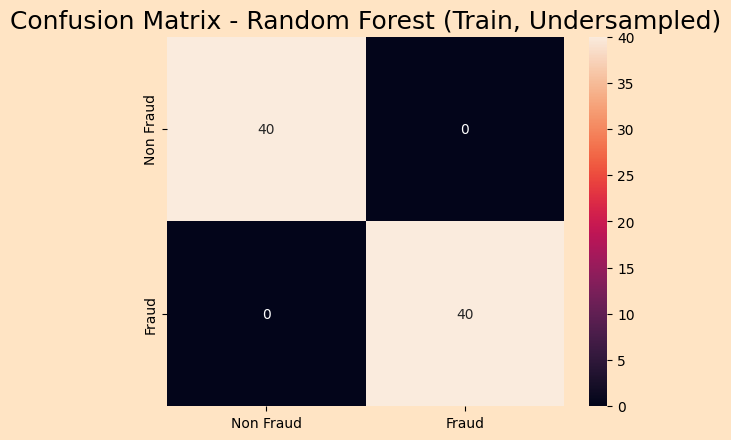

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_resampled,rf_train_resampled_preds,labels=random_forest.classes_)

ax = sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - Random Forest (Train, Undersampled)',fontsize=18)

plt.gcf().patch.set_facecolor('bisque')

In [ ]:
# Use the model to predict on test data
rf_test_preds = random_forest.predict(X_test)

rf_test_results = get_test_scores('RF (test)',rf_test_preds,y_test)
rf_test_results

,model,precision,recall,F1,accuracy
0,RF (test),0.802888,0.802888,0.802888,0.802888


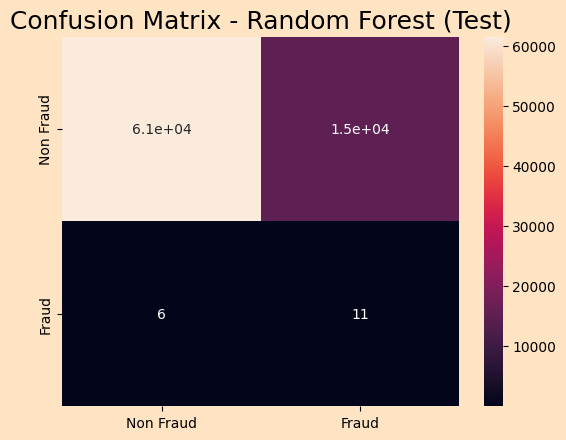

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,rf_test_preds,labels=random_forest.classes_)

ax = sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - Random Forest (Test)',fontsize=18)

plt.gcf().patch.set_facecolor('bisque')

In [ ]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic',random_state=42)

xgb.fit(X_resampled,y_resampled)

# Use the model to predict on train data
xgb_train_resampled_preds = xgb.predict(X_resampled)

xgb_train_resampled_results = get_test_scores('XGB (train, undersampled)',xgb_train_resampled_preds,y_resampled)
xgb_train_resampled_results

,model,precision,recall,F1,accuracy
0,"XGB (train, undersampled)",1.0,1.0,1.0,1.0


In [ ]:
# Use the model to predict on test data
xgb_test_preds = xgb.predict(X_test)

xgb_test_results = get_test_scores('XGB (test)',xgb_test_preds,y_test)
xgb_test_results

,model,precision,recall,F1,accuracy
0,XGB (test),0.813787,0.813787,0.813787,0.813787


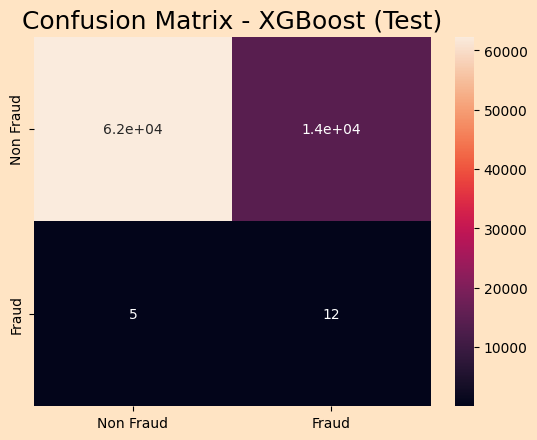

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,xgb_test_preds,labels=xgb.classes_)

ax = sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - XGBoost (Test)',fontsize=18)

plt.gcf().patch.set_facecolor('bisque')